In [1]:
import pandas as pd
import warnings
import numpy as np
import itertools

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
power = pd.read_csv("power.csv")

In [3]:
power.head()

,2016-07-02T00:00:12+05:30,207
0,2016-07-02T00:00:42+05:30,209
1,2016-07-02T00:01:12+05:30,2235
2,2016-07-02T00:01:42+05:30,2356
3,2016-07-02T00:02:12+05:30,2335
4,2016-07-02T00:02:42+05:30,2319


In [4]:
power.shape

(23017, 2)

In [5]:
def returnsample(power):
    returnempty = []
    for i in range(0,round(power.shape[0]/300)-1):
        empty = []
        empty = power[i*300+1:i*300+300]
        returnempty.append(np.average(empty))
        
    empty = power[300*(round(power.shape[0]/300)-1):]
    returnempty.append(np.average(empty))
    
    return returnempty

In [6]:
del power["2016-07-02T00:00:12+05:30"]

In [7]:
data = returnsample(power)

In [8]:
len(data)

77

In [9]:
train = data[0:round(len(data)*0.6)]

In [10]:
test = data[round(len(data)*0.6):]

In [11]:
len(test)

31

In [12]:
len(train)

46

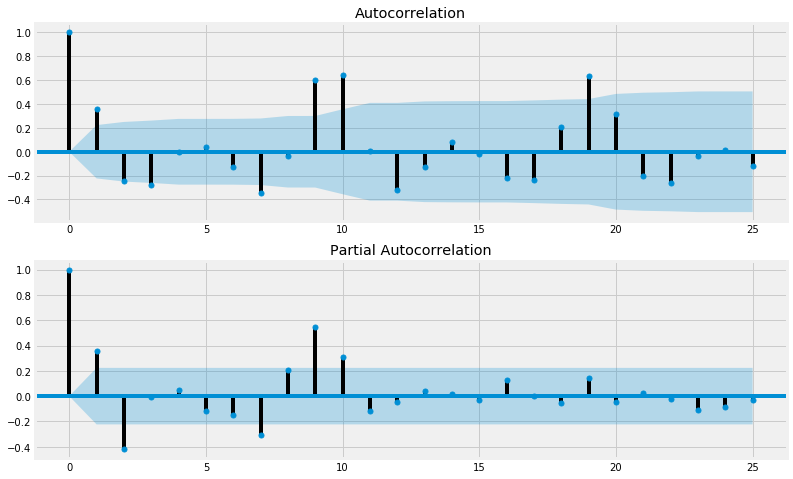

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=25, ax=ax2)

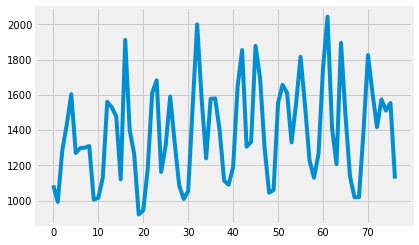

In [10]:
plt.plot(data)
plt.show()

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [21]:
k = 300000
newparam = 0,0,0
newsparam = 0,0,0
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
     
        try:
            mod = sm.tsa.statespace.SARIMAX(data,order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            #selecting the best result
            if results.aic < k:
                k = results.aic
                newparam = param
                newsparam = param_seasonal
        except:
            continue
print("Best param is: ",newparam," Best Seasonal Param is: ", newsparam, " Best Result is: ",k)

ARIMA(0, 0, 0)x(0, 0, 1, 1)12 - AIC:1222.7454727494048
ARIMA(0, 0, 0)x(0, 1, 1, 1)12 - AIC:1049.2875061942366
ARIMA(0, 0, 0)x(1, 0, 0, 1)12 - AIC:1091.351730829052
ARIMA(0, 0, 0)x(1, 0, 1, 1)12 - AIC:1063.0607000318462
ARIMA(0, 0, 0)x(1, 1, 0, 1)12 - AIC:1078.7744290327462
ARIMA(0, 0, 0)x(1, 1, 1, 1)12 - AIC:1041.6464136148727
ARIMA(0, 0, 1)x(0, 0, 0, 1)12 - AIC:1222.7454727494048
ARIMA(0, 0, 1)x(0, 0, 1, 1)12 - AIC:1172.8908978803088
ARIMA(0, 0, 1)x(0, 1, 0, 1)12 - AIC:1049.2875061942366
ARIMA(0, 0, 1)x(0, 1, 1, 1)12 - AIC:1052.848080917297
ARIMA(0, 0, 1)x(1, 0, 0, 1)12 - AIC:1080.2269749833392
ARIMA(0, 0, 1)x(1, 0, 1, 1)12 - AIC:1033.904625791548
ARIMA(0, 0, 1)x(1, 1, 0, 1)12 - AIC:1041.6464145852801
ARIMA(0, 0, 1)x(1, 1, 1, 1)12 - AIC:1021.5664597366313
ARIMA(0, 1, 0)x(0, 0, 1, 1)12 - AIC:1049.2875061942366
ARIMA(0, 1, 0)x(0, 1, 1, 1)12 - AIC:1054.78152249079
ARIMA(0, 1, 0)x(1, 0, 0, 1)12 - AIC:1078.7744290327462
ARIMA(0, 1, 0)x(1, 0, 1, 1)12 - AIC:1041.6464136148727
ARIMA(0, 1, 0)x

In [12]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(3, 1, 2),
                                seasonal_order=(3, 3, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3822      0.381     -3.631      0.000      -2.128      -0.636
ar.L2         -0.6842      0.439     -1.559      0.119      -1.544       0.176
ar.L3         -0.2113      0.255     -0.828      0.408      -0.711       0.289
ma.L1         -0.0035      2.321     -0.002      0.999      -4.552       4.545
ma.L2         -0.9977      0.211     -4.728      0.000      -1.411      -0.584
ar.S.L1       -0.1134      0.356     -0.319      0.750      -0.811       0.584
ar.S.L2       -0.1115      0.387     -0.288      0.773      -0.871       0.648
ar.S.L3       -0.4697      0.250     -1.879      0.060      -0.960       0.020
sigma2      9.754e+04   2.32e-05   4.21e+09      0.000    9.75e+04    9.75e+04


C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\base\model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [39]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()

In [42]:
pred_ci.head()

,lower y,upper y
0,-4382.612703,4382.612703
1,-1369.853591,6370.721003
2,-2476.905450,3607.981295
3,-983.964882,5260.884645
4,-1978.096795,4454.539758


In [13]:
import tensorflow as tf

In [15]:
energy = pd.read_csv("energy.csv")

In [16]:
del energy["2016-07-02T00:00:12+05:30"]

In [17]:
energydata = returnsample(energy)

In [30]:
# PlaceHolder
y = tf.placeholder(shape=[], dtype=tf.float32, name = "y")
x = tf.placeholder(shape=[], dtype=tf.float32, name = "y")

#Variable
A = tf.Variable(1,dtype=tf.float32)

#output
output = tf.multiply(x,A)

#using L2 loss
loss = loss = tf.reduce_mean(tf.square(y - output))
sess = tf.Session()

In [33]:
# Declare optimizer
alpha = 0.001
my_opt = tf.train.AdamOptimizer(alpha)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [37]:
aval = []
for i in range(len(energydata)):
    x_input = data[i]
    y_input = energydata[i]
    sess.run(train_step, feed_dict={x :x_input , y: y_input})
    print(sess.run(A))
    aval.append(sess.run(A))

1.08942
1.09059
1.09169
1.09274
1.09375
1.0947
1.09562
1.0965
1.09736
1.09817
1.09895
1.09971
1.10046
1.10121
1.10195
1.10268
1.10344
1.10419
1.10493
1.10565
1.10635
1.10705
1.10777
1.10852
1.10925
1.11
1.11076
1.11154
1.1123
1.11305
1.1138
1.11458
1.1154
1.11625
1.1171
1.11797
1.11887
1.11977
1.12067
1.12156
1.12245
1.12337
1.12434
1.12531
1.12629
1.12731
1.12836
1.12941
1.13044
1.13146
1.1325
1.13357
1.13467
1.13577
1.13689
1.13805
1.13923
1.14039
1.14154
1.14269
1.14388
1.14512
1.14636
1.1476
1.14887
1.15015
1.15142
1.15265
1.15385
1.15507
1.15633
1.15762
1.15892
1.16023
1.16156
1.1629


In [43]:
# aval has the values of the physical model and pred_ci has the SARIMA 